In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
### read the tab separated file containing healthcare provider data as a pandas DataFrame

provider_df = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2017/Medicare_Provider_Util_Payment_PUF_CY2017.txt', "\t")

provider_df.tail()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
9847439,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99214,Established patient office or other outpatient...,N,248.0,175.0,248.0,116.86,345.0,85.637177,80.263065
9847440,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99223,"Initial hospital inpatient care, typically 70 ...",N,41.0,41.0,41.0,203.40,496.0,225.564634,155.800732
9847441,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99232,"Subsequent hospital inpatient care, typically ...",N,101.0,57.0,101.0,72.48,176.0,83.200000,57.390000
9847442,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99233,"Subsequent hospital inpatient care, typically ...",N,102.0,55.0,102.0,104.76,254.0,119.450784,82.450490
9847443,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99239,"Hospital discharge day management, more than 3...",N,49.0,49.0,49.0,107.98,262.0,123.950000,85.540000


In [5]:
convicted_df = pd.read_csv('LEIE.csv')
convicted_df.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN


In [6]:
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 26 columns):
npi                                 int64
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip                  object
nppes_provider_state                object
nppes_provider_country              object
provider_type                       object
medicare_participation_indicator    object
place_of_service                    object
hcpcs_code                          object
hcpcs_description                   object
hcpcs_drug_indicator                object
line_srvc_cnt                       float64
bene_unique_cnt            

In [7]:
provider_df.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
count,9.847444e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06,9.847443e+06
mean,1.499839e+09,2.448553e+02,8.777250e+01,1.403349e+02,1.015993e+02,3.515861e+02,7.753480e+01,7.822188e+01
std,2.877164e+08,5.122602e+03,1.167731e+03,1.985972e+03,2.764955e+02,1.064216e+03,2.152963e+02,2.158862e+02
min,1.000000e+00,2.400000e+00,1.100000e+01,1.100000e+01,6.035380e-05,6.035380e-05,0.000000e+00,0.000000e+00
25%,1.255301e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.426084e+01,5.800000e+01,1.928420e+01,2.009083e+01
50%,1.497985e+09,4.300000e+01,3.200000e+01,4.000000e+01,6.499769e+01,1.460000e+02,4.695941e+01,4.775953e+01
75%,1.740675e+09,1.170000e+02,7.500000e+01,1.060000e+02,1.135045e+02,3.000000e+02,8.519500e+01,8.525000e+01
max,1.993000e+09,7.195536e+06,7.928730e+05,1.504215e+06,5.668435e+04,9.999999e+04,4.443910e+04,4.443910e+04


In [8]:
convicted_df.describe()

,NPI,DOB,ZIP,EXCLDATE,REINDATE,WAIVERDATE
count,7.267600e+04,6.869100e+04,72676.000000,7.267600e+04,72676.0,7.267600e+04
mean,1.096020e+08,1.961971e+07,51420.786642,2.006805e+07,0.0,4.148421e+03
std,3.979338e+08,1.404949e+05,29593.928817,8.143594e+04,0.0,2.887307e+05
min,0.000000e+00,1.901010e+07,0.000000,1.977070e+07,0.0,0.000000e+00
25%,0.000000e+00,1.953032e+07,29918.000000,2.001052e+07,0.0,0.000000e+00
50%,0.000000e+00,1.962041e+07,45694.000000,2.007102e+07,0.0,0.000000e+00
75%,0.000000e+00,1.972050e+07,78416.000000,2.014052e+07,0.0,0.000000e+00
max,1.992979e+09,1.999043e+07,99927.000000,2.019122e+07,0.0,2.017062e+07


### Looking for null values. 

In [9]:
pd.isnull(provider_df).any()

npi                                 False
nppes_provider_last_org_name         True
nppes_provider_first_name            True
nppes_provider_mi                    True
nppes_credentials                    True
nppes_provider_gender                True
nppes_entity_code                    True
nppes_provider_street1               True
nppes_provider_street2               True
nppes_provider_city                  True
nppes_provider_zip                   True
nppes_provider_state                 True
nppes_provider_country               True
provider_type                        True
medicare_participation_indicator     True
place_of_service                     True
hcpcs_code                           True
hcpcs_description                    True
hcpcs_drug_indicator                 True
line_srvc_cnt                        True
bene_unique_cnt                      True
bene_day_srvc_cnt                    True
average_Medicare_allowed_amt         True
average_submitted_chrg_amt        

In [10]:
clms = provider_df.columns ### gives the columns of the DF. .index will give the row index and 
### .values will give the values

clms

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')

In [11]:
provider_df = provider_df[1:]  ### dropping the first instance which is not an NPI

### Performing Dimensionality Reduction

In [12]:
### selecting the important attributes/features

selected_provider_data = provider_df[['npi', 'nppes_provider_gender', 'provider_type', 
                             'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
                             'average_submitted_chrg_amt', 'average_Medicare_allowed_amt', 
                             'average_Medicare_payment_amt']].dropna(axis=0)


In [13]:
### Looking for missing values in NPI
print(selected_provider_data['npi'].describe())

nadropped = selected_provider_data.dropna(axis=0)

print(nadropped['npi'].describe())



count    9.416125e+06
mean     1.499785e+09
std      2.877289e+08
min      1.003000e+09
25%      1.255302e+09
50%      1.497969e+09
75%      1.740681e+09
max      1.993000e+09
Name: npi, dtype: float64
count    9.416125e+06
mean     1.499785e+09
std      2.877289e+08
min      1.003000e+09
25%      1.255302e+09
50%      1.497969e+09
75%      1.740681e+09
max      1.993000e+09
Name: npi, dtype: float64


In [14]:
pd.isnull(nadropped).any() ### confirming if there are any missing values

npi                             False
nppes_provider_gender           False
provider_type                   False
line_srvc_cnt                   False
bene_unique_cnt                 False
bene_day_srvc_cnt               False
average_submitted_chrg_amt      False
average_Medicare_allowed_amt    False
average_Medicare_payment_amt    False
dtype: bool

In [15]:
convicted_df.columns

Index(['LASTNAME', 'FIRSTNAME', 'MIDNAME', 'BUSNAME', 'GENERAL', 'SPECIALTY',
       'UPIN', 'NPI', 'DOB', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'EXCLTYPE',
       'EXCLDATE', 'REINDATE', 'WAIVERDATE', 'WVRSTATE'],
      dtype='object')

In [16]:
selected_convicted_data = convicted_df[['NPI']].dropna(axis=0)

selected_convicted_data.describe()

,NPI
count,7.267600e+04
mean,1.096020e+08
std,3.979338e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.992979e+09


### Joining the provider dataset with LEIE labeled dataset.

In [17]:
merged_dataset = pd.merge(selected_provider_data, selected_convicted_data, 
                          how='right', left_on='npi', right_on='NPI').dropna(axis=0)

merged_dataset

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
0,1.003128e+09,M,Internal Medicine,617.0,499.0,617.0,332.463533,219.944716,170.918590,1003127655
1,1.003128e+09,M,Internal Medicine,249.0,17.0,249.0,69.899598,42.570080,33.024418,1003127655
2,1.003128e+09,M,Internal Medicine,1220.0,235.0,1220.0,120.000000,78.414213,61.340197,1003127655
3,1.003128e+09,M,Internal Medicine,754.0,434.0,754.0,172.590186,113.284987,88.611313,1003127655
4,1.003128e+09,M,Internal Medicine,543.0,448.0,543.0,188.176796,117.852320,91.907495,1003127655
...,...,...,...,...,...,...,...,...,...,...
1810,1.982676e+09,M,Emergency Medicine,265.0,67.0,265.0,125.000000,67.717925,43.902528,1982676136
1811,1.982676e+09,M,Emergency Medicine,24.0,24.0,24.0,165.000000,102.440000,34.667917,1982676136
1812,1.992768e+09,M,Family Practice,29.0,27.0,29.0,574.000000,65.900000,49.888276,1992768477
1813,1.992768e+09,M,Family Practice,32.0,32.0,32.0,757.000000,125.010000,92.168750,1992768477


In [18]:
%matplotlib inline

merged_dataset.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,1.529590e+09,258.408815,71.072176,146.446832,254.192434,99.720832,72.825212,1.529590e+09
std,2.792831e+08,1215.762687,106.159045,299.869515,917.186901,299.742333,234.570899,2.792831e+08
min,1.003128e+09,11.000000,11.000000,11.000000,0.468966,0.019024,0.013659,1.003128e+09
25%,1.306868e+09,25.000000,18.000000,24.000000,50.000000,24.601667,17.619372,1.306868e+09
50%,1.538186e+09,56.000000,34.000000,50.000000,134.052632,70.240000,46.861935,1.538186e+09
75%,1.780673e+09,160.000000,75.000000,136.500000,241.631579,114.695000,82.487157,1.780673e+09
max,1.992768e+09,26460.000000,1107.000000,4439.000000,23150.550000,7500.060000,5879.588571,1.992768e+09


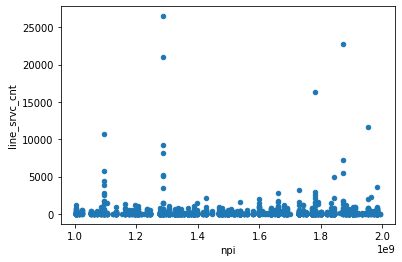

In [19]:
merged_dataset.plot(kind='scatter', x='npi', y='line_srvc_cnt')

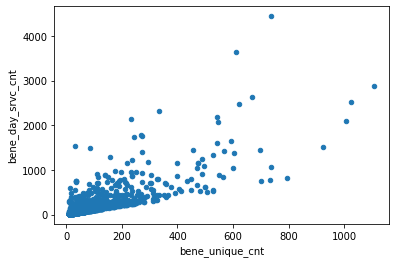

In [20]:
merged_dataset.plot(kind='scatter', x='bene_unique_cnt', y='bene_day_srvc_cnt')

In [21]:
merged_dataset.nunique()

npi                              190
nppes_provider_gender              2
provider_type                     39
line_srvc_cnt                    471
bene_unique_cnt                  282
bene_day_srvc_cnt                425
average_submitted_chrg_amt      1026
average_Medicare_allowed_amt    1589
average_Medicare_payment_amt    1749
NPI                              190
dtype: int64

In [22]:
merged_dataset['nppes_provider_gender'].describe()

count     1815
unique       2
top          M
freq      1724
Name: nppes_provider_gender, dtype: object

In [23]:
provider_df['nppes_provider_gender'].describe()

count     9416125
unique          2
top             M
freq      6535107
Name: nppes_provider_gender, dtype: object

In [24]:
1724/1815 ### %age of males in excluded dataset

0.949862258953168

In [25]:
6535107/9416125 ### %age of males in dataset B

0.6940335860027347

In [26]:
merged_dataset.columns

Index(['npi', 'nppes_provider_gender', 'provider_type', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_submitted_chrg_amt',
       'average_Medicare_allowed_amt', 'average_Medicare_payment_amt', 'NPI'],
      dtype='object')

In [27]:
### Looking for differences in NPI values in two datasets

comparison = merged_dataset['npi'] == merged_dataset['NPI']

comparison.nunique()

1

Since they are the same, we can drop one of these two columns. 

In [28]:
merged_dataset = merged_dataset.drop('NPI', axis=1)
merged_dataset.head(10)

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt
0,1.003128e+09,M,Internal Medicine,617.0,499.0,617.0,332.463533,219.944716,170.918590
1,1.003128e+09,M,Internal Medicine,249.0,17.0,249.0,69.899598,42.570080,33.024418
2,1.003128e+09,M,Internal Medicine,1220.0,235.0,1220.0,120.000000,78.414213,61.340197
3,1.003128e+09,M,Internal Medicine,754.0,434.0,754.0,172.590186,113.284987,88.611313
4,1.003128e+09,M,Internal Medicine,543.0,448.0,543.0,188.176796,117.852320,91.907495
5,1.003128e+09,M,Internal Medicine,414.0,316.0,414.0,273.828502,181.887440,139.755266
6,1.003128e+09,M,Internal Medicine,658.0,218.0,658.0,141.793313,100.259909,77.022340
7,1.003128e+09,M,Internal Medicine,52.0,51.0,52.0,90.000000,60.180000,47.180000
8,1.003811e+09,M,Pain Management,90.0,32.0,90.0,105.000000,84.290000,53.103444
9,1.003811e+09,M,Pain Management,126.0,46.0,126.0,130.000000,123.460000,83.113968


In [29]:
merged_dataset.shape

(1815, 9)

In [30]:
selected_provider_data.dtypes

npi                               int64
nppes_provider_gender            object
provider_type                    object
line_srvc_cnt                   float64
bene_unique_cnt                 float64
bene_day_srvc_cnt               float64
average_submitted_chrg_amt      float64
average_Medicare_allowed_amt    float64
average_Medicare_payment_amt    float64
dtype: object

Applying same transformations to labeled dataset.

merged_dataset['nppes_provider_gender'] = le.fit_transform(merged_dataset['nppes_provider_gender'])
merged_dataset['provider_type'] = le.fit_transform(merged_dataset['provider_type'])

labeled_dataset = one_hot_encoder.fit_transform(merged_dataset)

### Converting sparse matrix back to DataFrame

from scipy import sparse

final_provider_df = pd.DataFrame.sparse.from_spmatrix(final_provider_dataset)

#labeled_dataset = pd.DataFrame(labeled_dataset.todense())

#print(labeled_dataset.shape)

print(final_provider_dataset.shape)


### Fraud and non-fraud labels

One extra feature needs to be created to label the npi as fraudulent or non-fraudulent. 

In [ ]:
labeled_dataset.head()

In [ ]:
merged_dataset.head()

In [ ]:
X_train['provider_type'].nunique()

In [ ]:
merged_dataset.npi = merged_dataset.npi.astype(int)

In [ ]:
type(merged_dataset)

In [ ]:
type(selected_provider_data)

### Adding a feature for fraud labeling

In [34]:
merged_dataset['label'] = 1

In [35]:
labeled_final = pd.merge(selected_provider_data, merged_dataset[['npi', 'label']], 
                        how='left', on='npi').fillna(0)


In [36]:
labeled_final.head()

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,label
0,1003000126,M,Internal Medicine,100.0,96.0,100.0,325.780000,73.398800,56.827200,0.0
1,1003000126,M,Internal Medicine,26.0,25.0,26.0,449.000000,100.080000,78.460000,0.0
2,1003000126,M,Internal Medicine,52.0,51.0,52.0,614.000000,136.380000,102.807692,0.0
3,1003000126,M,Internal Medicine,59.0,59.0,59.0,755.932203,190.363729,141.293559,0.0
4,1003000126,M,Internal Medicine,16.0,16.0,16.0,462.812500,101.680000,79.710000,0.0


In [37]:
labeled_final.shape

(9449787, 10)

In [38]:
labeled_final.dtypes


npi                               int64
nppes_provider_gender            object
provider_type                    object
line_srvc_cnt                   float64
bene_unique_cnt                 float64
bene_day_srvc_cnt               float64
average_submitted_chrg_amt      float64
average_Medicare_allowed_amt    float64
average_Medicare_payment_amt    float64
label                           float64
dtype: object

In [39]:
labeled_final['label'].describe()

count    9.449787e+06
mean     3.753418e-03
std      6.115006e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: label, dtype: float64

In [40]:
labeled_final.columns

Index(['npi', 'nppes_provider_gender', 'provider_type', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_submitted_chrg_amt',
       'average_Medicare_allowed_amt', 'average_Medicare_payment_amt',
       'label'],
      dtype='object')

### Splitting the data into train and test datasets. 

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(labeled_final[['npi', 'nppes_provider_gender', 'provider_type', 
                                   'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt', 
                                   'average_submitted_chrg_amt','average_Medicare_allowed_amt',
                                   'average_Medicare_payment_amt']], labeled_final['label'],
                                    random_state=0)



In [42]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (7087340, 9)
y_train shape: (7087340,)


In [43]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (2362447, 9)
y_test shape: (2362447,)


### Removing npi feature as it is not required in training the model. 

In [44]:
X_train = X_train.iloc[:, 1:]

In [45]:
X_train.head()

,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt
1169916,F,Dermatology,26.0,26.0,26.0,122.0000,79.350000,41.471923
2925048,F,Radiation Oncology,176.0,49.0,176.0,505.0000,187.230000,146.780000
2006807,M,Neurology,320.0,170.0,320.0,128.0125,79.861656,62.125813
8486466,M,Family Practice,53.0,51.0,53.0,55.0000,18.680000,12.982642
1491221,M,Cardiology,20.0,20.0,20.0,30.0000,14.720000,11.540000


### Label encoding categorical str features followed by one hot encoding. This results in a sparse matrix scipy object. LabelBinarizer can be used to combine the transformations by two encoders.

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

X_train['nppes_provider_gender'] = le.fit_transform(X_train['nppes_provider_gender'])
X_train['provider_type'] = le.fit_transform(X_train['provider_type'])


one_hot_encoder = OneHotEncoder(categorical_features=[0, 1])
X_train = one_hot_encoder.fit_transform(X_train)


In [47]:
type(X_train)

scipy.sparse.coo.coo_matrix

### Converting sparse matrix back to DataFrame

In [48]:
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

print(X_train.shape)

(7087340, 96)


In [49]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,26.0,26.0,122.0000,79.350000,41.471923
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,176.0,49.0,176.0,505.0000,187.230000,146.780000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,320.0,170.0,320.0,128.0125,79.861656,62.125813
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53.0,51.0,53.0,55.0000,18.680000,12.982642
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,20.0,20.0,30.0000,14.720000,11.540000


### Finally, the dataset is ready for the model. Hurray...

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

lr_fitting = log_reg.fit(X_train, y_train)

In [58]:
log_reg.predict(X_train)

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
X_train.shape

(7087340, 96)

In [61]:
lr_fitting.score(X_train, y_train)

0.9962304616400511

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(cv=5, random_state=0)
lr_cv_fitting = lr_cv.fit(X_train, y_train)